In [5]:
import numpy as np
import networkx as nwx
import matplotlib as mp
import pandas as pd
import statistics as st
pd.pandas.set_option('display.max_columns', None)
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats.mstats import zscore
import scipy.stats as st

from sklearn.metrics import median_absolute_error, r2_score

import os
import json
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import scipy.stats as sp_stats
import matplotlib.pyplot as plt
sns.set(style="white", font_scale=1.2)

import sklearn.metrics as skm
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict


Here matplotlib, matplotlib, pandas and networkx are imported

In [2]:
data_time_of_day = pd.read_excel("ece_143_data.xlsx",sheet_name="Fig 2",usecols='A, B')


Plot for figure 1

In [8]:
import statistics as st
fig1_dict = dict()
for index, row in data_time_of_day.iterrows():
    time=row['Time of day (hour)']
    alert=row['Alertness']
    if fig1_dict.get(time) is not None:
        fig1_dict[time].append(alert)
    else:
        fig1_dict[time]=[]


avg = dict()
std = dict()
for index in fig1_dict.keys():
    if len(fig1_dict[index])>1:
        avg[index]=st.mean(fig1_dict[index])
        std[index]=st.stdev(fig1_dict[index])



This is for ploting the errorbar plot

[8, 9, 10, 11, 13, 14, 15, 18, 20, 12, 16, 17, 21, 7, 19, 23, 22, 6, 5, 2, 4, 3]


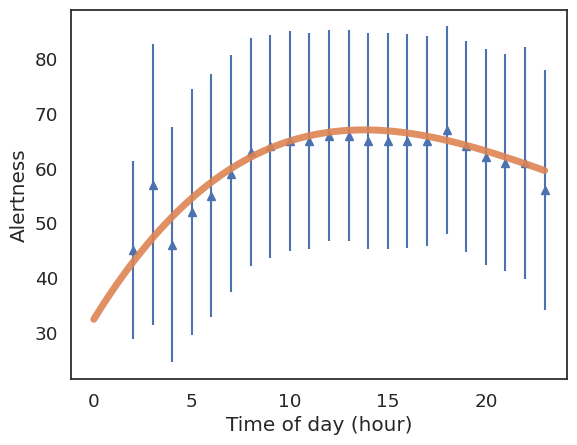

In [9]:

x = []

y = []
z =[]
fig, ax = plt.subplots(1, 1, dpi=100)
for i in fig1_dict.keys():
    if len(fig1_dict[i])>1:
        x.append(i)
        y.append(avg[i])
        z.append(std[i])

y = np.array(y)
z = np.array(z)

print(x)

plt.errorbar(x, y, z, linestyle='None', marker='^')
sns.regplot(data=data_time_of_day[data_time_of_day['Time of day (hour)'].between(0, 23)],
            x="Time of day (hour)", y="Alertness", order=3, 
            ci=None, line_kws=dict(lw=5, zorder=20, alpha=0.9), scatter=False, ax=ax)

plt.show()

This is for ploting the barchart, first import the data as polar_data

In [15]:
polar_data = pd.read_excel("ece_143_data.xlsx",sheet_name="Fig 2",usecols='B, D')
polar_dict = dict()


In [20]:
import math
for index, row in polar_data.iterrows():
    time=row['Alertness rating: time of day (radians)']
    alert=row['Alertness']
    polar_dict[time]=alert


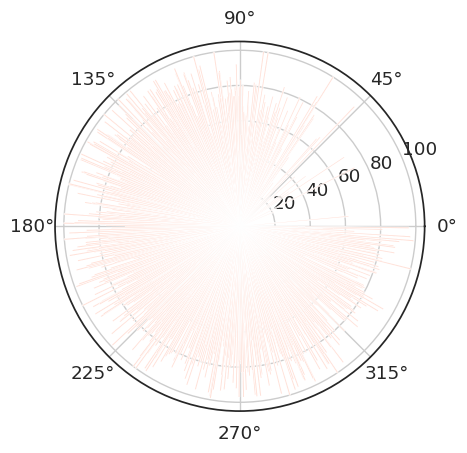

In [44]:
import matplotlib.pyplot as plt
import math
x = []
y = []

max_height = 0
N = 0
for i in polar_dict.keys():
    x.append(i)
    y.append(polar_dict[i])
    N = N+1
    if polar_dict[i]>max_height:
        max_height = polar_dict[i]

    
x = np.array(x)
y = np.array(y)

theta = x
radii=y

bottom = 0
width = (2*np.pi)/N

colors = plt.cm.hsv(theta/2/np.pi)

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom,color=colors)

for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.hsv(10))
    bar.set_alpha(0.8)


plt.show()

/tmp/ipykernel_30/2444852510.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




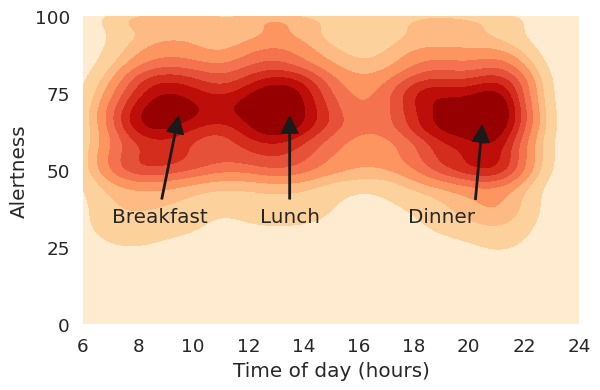

In [46]:
fig, ax = plt.subplots(figsize=(6.4, 4), dpi=100)

sns.kdeplot(
    x=data_time_of_day["Time of day (hour)"], y=data_time_of_day["Alertness"], 
    shade=True, cmap="OrRd", thresh=0, alpha=1, cbar=False, ax=ax)  # OrRd

plt.ylabel("Alertness")

plt.ylim(0, 100)
plt.yticks([0, 25, 50, 75, 100])
plt.xlabel("Time of day (hours)")
xticks = np.arange(6, 26, 2)
plt.xticks(xticks, xticks)
plt.xlim(6, 24)

ax.annotate(
     "Breakfast", xy=(9.5, 69), xycoords='data',
     xytext=(8.8, 35), textcoords='data', ha='center', va='center',
     arrowprops=dict(fc='k', ec='k',shrink=0.05, width=1, connectionstyle="arc3,rad=0"),
)

ax.annotate(
     "Lunch", xy=(13.5, 69), xycoords='data',
     xytext=(13.5, 35), textcoords='data', ha='center', va='center',
     arrowprops=dict(fc='k', ec='k',shrink=0.05, width=1, connectionstyle="arc3,rad=0"),
)

ax.annotate(
     "Dinner", xy=(20.5, 66), xycoords='data',
     xytext=(19, 35), textcoords='data', ha='center', va='center',
     arrowprops=dict(fc='k', ec='k',shrink=0.05, width=1, connectionstyle="arc3,rad=0"),
)

# plt.tight_layout()
sns.despine(bottom=True, left=True)

Morning breakfast plot

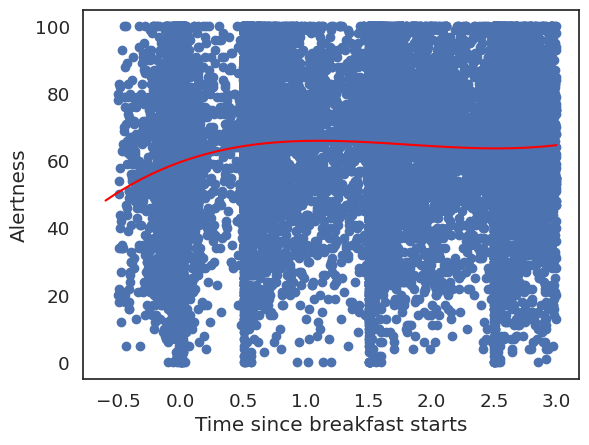

In [24]:

breakfast = pd.read_excel("ece_143_data.xlsx",sheet_name="Fig 2",usecols='F, G')
breakfast.dropna(inplace=True)
bf_time=[]
bf_alert=[]
import math
for index, row in breakfast.iterrows():
    time=row['Time since breakfast start']
    alert=row['Alertness.1']
    bf_time.append(time)
    bf_alert.append(alert)

fig = px.scatter(breakfast, x='Time since breakfast start', y='Alertness.1',
                 title="Alertness VS time since breakfast starts",
                 # customize axis label
                )

fig.show()


bf_time = np.array(bf_time)
bf_alert = np.array(bf_alert)
#fit cubic regression model
model = np.poly1d(np.polyfit(bf_time, bf_alert, 3))

#add fitted cubic regression line to scatterplot
polyline = np.linspace(-0.6, 3.0, 50)
plt.scatter(bf_time, bf_alert)
plt.plot(polyline, model(polyline),color='red')

#add axis labels
plt.xlabel('Time since breakfast starts')
plt.ylabel('Alertness')

#display plot
plt.show()
    


Histogram of amount of people have lunch at specific times

['1am', '3am', '5am', '7am', '9am', '11am', '1pm', '3pm', '5pm', '7pm', '9pm', '11pm']


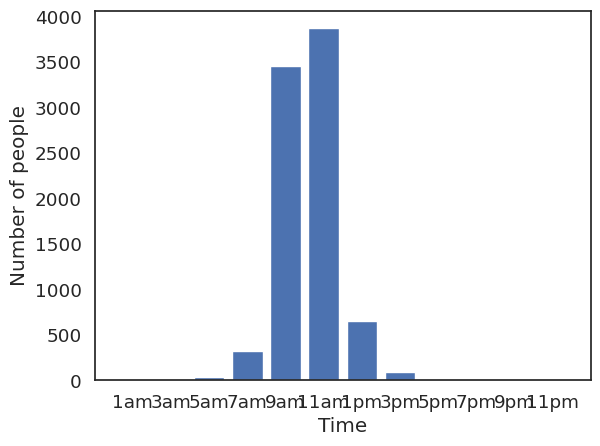

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import math
# Make a random dataset:
breakfast = pd.read_excel("ece_143_data.xlsx",sheet_name="Fig 2",usecols='I')
breakfast.dropna(inplace=True)
time = []
period=["1am", "3am","5am","7am","9am","11am","1pm","3pm","5pm","7pm","9pm","11pm",]
for i in range(12):
    time.append(0)

for index, row in breakfast.iterrows():
    bt = row['Breakfast start time (hours)']
    bt = math.ceil(bt/2)
    time[bt] = time[bt]+1

y_pos = np.arange(len(period))
# Create bars
plt.bar(y_pos,time)

print(period)
# Create names on the x-axis
plt.xticks(y_pos,period)
plt.xlabel('Time')
plt.ylabel('Number of people')
# Show graphic
plt.show()

In [ ]:
data = pd.read_excel("ece_143_data.xlsx",sheet_name="Fig3",usecols='A, B, C, D, E, F, G, H, I , J,K')

In [ ]:
breakfast.head(10)

First calculate the regression result

In [ ]:




alert = []
sleepEff = []
L5Value = []
L5Onset=[]
HC = []
HC_a=[]
HP=[]
HP_a=[]
HFat=[]
HFat_a=[]
HF_a=[]
HF=[]
MCB_a=[]
MCB=[]
OGTT_a=[]
OGTT=[]


for index, row in data.iterrows():
    alertness=row['Morning Alertness']
    alert.append(alertness)
    sleepEff.append(row['sleepoffset_hr_pcen'])
    key = row['meal_type_breakfast']
    val = row['meal_log_iauc_breakfast']
    if key == 'MCB':
        MCB_a.append(alertness)
        MCB.append(val)
    elif key == 'OGTT':
        OGTT_a.append(alertness)
        OGTT.append(val)
    elif key == 'High Fibre':
        HF_a.append(alertness)
        HF.append(val)
    elif key == 'High Fat':
        HFat_a.append(alertness)
        HFat.append(alertness)
    elif key == 'High Carb':
        HC_a.append(alertness)
        HC.append(val)
    elif key =='High Protein':
        HP_a.append(alertness)
        HP.append(val)
        



print('The Beta Coeff is: %f' % rvalue)
print(interval)




Morning alertness actual VS perdiction

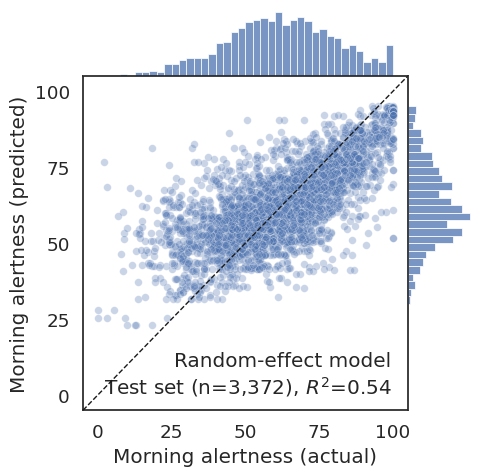

In [32]:
import pingouin as pg
import scipy.stats as sp_stats
data = pd.read_excel("ece_143_data.xlsx",sheet_name="Fig 4",usecols='C, D, E')
data.dropna(inplace=True)

import math
g = sns.jointplot(x="Morning Alertness (true)", y="Morning Alertness (predictions from naive model)", kind="scatter", 
                  data=data, height=5, space=0,
                  joint_kws=dict(alpha=0.3, s=30),
                  marginal_kws=dict( bins=np.linspace(0, 100, 41)))

ax = g.ax_joint
ax.set_xlim(-5, 105)
ax.set_ylim(-5, 105)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_yticks([0, 25, 50, 75, 100])


r2 = r2_score(data['Morning Alertness (true)'], data['Morning Alertness (predictions from naive model)'])
mae = median_absolute_error(data['Morning Alertness (true)'], data['Morning Alertness (predictions from naive model)'])
text = f"Random-effect model\nTest set (n={data.shape[0]:,}), $R^2$=0.54"   
ax.annotate(text, xy=(0.95, 0.05), xycoords="axes fraction", ha="right", fontstyle="normal")

ax.axline((1, 1), slope=1, color="k", ls='--', lw=1, zorder=10)

ax.set_xlabel("Morning alertness (actual)")
ax.set_ylabel("Morning alertness (predicted)");

plt.show()




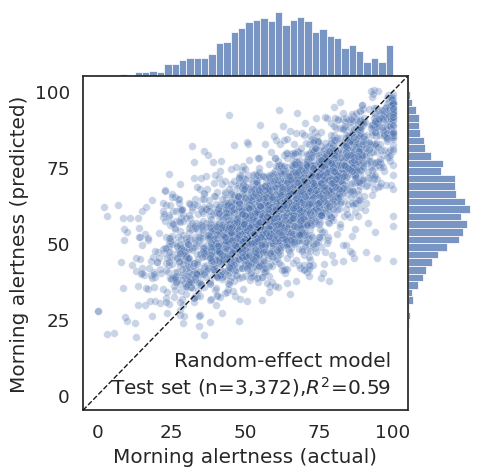

In [33]:
g = sns.jointplot(x="Morning Alertness (true)", y="Morning Alertness (predictions from full model)", kind="scatter", 
                  data=data, height=5, space=0,
                  joint_kws=dict(alpha=0.3, s=30),
                  marginal_kws=dict( bins=np.linspace(0, 100, 41)))

ax = g.ax_joint
ax.set_xlim(-5, 105)
ax.set_ylim(-5, 105)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_yticks([0, 25, 50, 75, 100])

r2 = r2_score(data['Morning Alertness (true)'], data['Morning Alertness (predictions from full model)'])
mae = median_absolute_error(data['Morning Alertness (true)'], data['Morning Alertness (predictions from full model)'])
text = f"Random-effect model\nTest set (n={data.shape[0]:,}),$R^2$=0.59"  
ax.annotate(text, xy=(0.95, 0.05), xycoords="axes fraction", ha="right", fontstyle="normal")

ax.axline((1, 1), slope=1, color="k", ls='--', lw=1, zorder=10)

ax.set_xlabel("Morning alertness (actual)")
ax.set_ylabel("Morning alertness (predicted)");

plt.show()

This is the figure for the perdicted trait alertness with mixed linear model vs the actual alertness

In [34]:
df = pd.read_excel("ece_143_data.xlsx",sheet_name="Fig 5")

In [35]:
# Check dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Trait Alertness (true)     833 non-null    float64
 1   Predicted Trait Alertness  833 non-null    float64
 2   Unnamed: 2                 0 non-null      float64
 3   Age                        833 non-null    float64
 4   Sex                        833 non-null    int64  
 5   Education                  833 non-null    float64
 6   Smoking status             833 non-null    float64
 7   BMI                        833 non-null    float64
 8   Sleep duration             833 non-null    float64
 9   Sleep efficiency           833 non-null    float64
 10  Sleep onset                833 non-null    float64
 11  Sleep offset               833 non-null    float64
 12  Social jetlag              833 non-null    float64
 13  PSQI                       833 non-null    float64

In [36]:
feat = {
    'Demographics': ['Age', 'Sex'],
    'Physiology': ['BMI'],
    'Mood': ['Happiness'] + ['Anxiety disorder', 'Depression'],
    'Eating behavior': ['Skip breakfast', 'Coffee consumption', 'Alcohol consumption', 'Eating frequency', 'Snacker'], 
    'Physical activity': ['L5 value',  'L5 clock time', 'M10 value', 'M10 clock time', 'Self-report exercise'],
}

pred = np.array(sum(list(feat.values()), []))

print(len(pred), 'predictors')
pred_cont = pred[df[pred].nunique() > 5].tolist()
print(f"There are {len(pred_cont)} continuous predictors")
corr_alert = df.pairwise_corr(columns=[['Trait Alertness (true)'], pred_cont], padjust="holm", method="pearson")
corr_alert = corr_alert.sort_values('p-unc').set_index(['Y'])[['n', 'r', 'p-corr']]  # 'p-unc'
corr_alert.round(4)

16 predictors
There are 14 continuous predictors


,n,r,p-corr
Y,,,
Happiness,833,0.6720,0.0000
Age,833,0.4322,0.0000
M10 clock time,833,0.3017,0.0000
BMI,833,0.2529,0.0000
M10 value,833,0.2257,0.0000
Depression,833,0.2123,0.0000
Eating frequency,833,0.2110,0.0000
L5 value,833,0.2090,0.0000
Self-report exercise,833,0.2025,0.0000


Text(34.724999999999994, 0.5, 'Morning alertness (grandmean)')

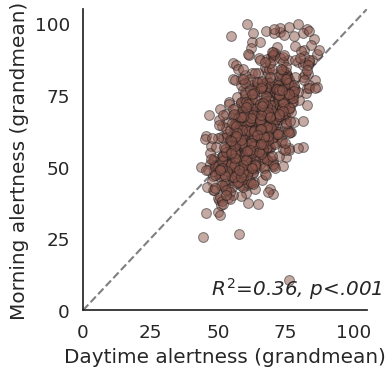

In [37]:
#Correlation between morning alertness and alertness
import pingouin as pg

sns.lmplot(x='Predicted Trait Alertness', y='Trait Alertness (true)', data=df, height=4,
           aspect=1, facet_kws=dict(legend_out=False), ci=None, fit_reg=False,
           truncate=False, 
           scatter_kws={'alpha': 0.5, "s": 50, "ec": "k", "lw": 0.75, "color": "tab:brown"})

plt.xlim(0, 105)
plt.ylim(0, 105)
plt.xticks([0, 25, 50, 75, 100])
plt.yticks([0, 25, 50, 75, 100])

ax = plt.gca()

# Add correlation
corr = df.pairwise_corr(columns=['Trait Alertness (true)', 'Predicted Trait Alertness'])
r2 = corr.at[0, "r"] ** 2
pval = corr.at[0, "p-unc"]
text = f"$R^2$={r2:.2f}, p<.001"
ax.annotate(text, xy=(0.45, 0.05), xycoords="axes fraction", ha="left", fontstyle="italic")

ax.axline((1, 1), slope=1, color="tab:grey", ls='--', lw=1.5, zorder=0)

plt.xlabel("Daytime alertness (grandmean)")
plt.ylabel("Morning alertness (grandmean)")

This plots the correlation between happiness and alertness

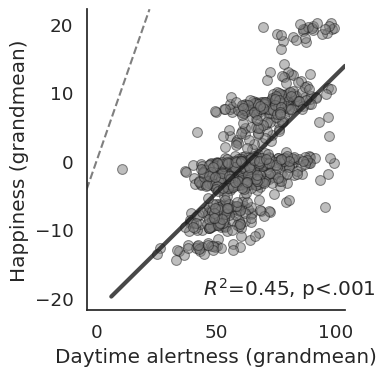

In [38]:
sns.lmplot(x='Trait Alertness (true)', y='Happiness', data=df, height=4,
           aspect=1, facet_kws=dict(legend_out=False), ci=None, fit_reg=True,
           truncate=False, 
           scatter_kws={'alpha': 0.5, "s": 50, "ec": "k", "lw": 0.75, "color": "tab:grey"},
           line_kws=dict(color="k", lw=3, alpha=0.8))



ax = plt.gca()

# Add unadjusted correlation
corr = df.pairwise_corr(columns=['Trait Alertness (true)', 'Happiness'])
r2 = corr.at[0, "r"] ** 2
pval = corr.at[0, "p-unc"]
text = f"$R^2$={r2:.2f}, p<.001"
ax.annotate(text, xy=(0.45, 0.05), xycoords="axes fraction", ha="left")

ax.axline((1, 1), slope=1, color="tab:grey", ls='--', lw=1.5, zorder=0)

plt.xlabel("Daytime alertness (grandmean)")
plt.ylabel("Happiness (grandmean)")
plt.tight_layout()
# plt.savefig("Figures/subplots/plot_corr_grandmean_alertness_happiness.png", dpi=300, bbox_inches="tight")v

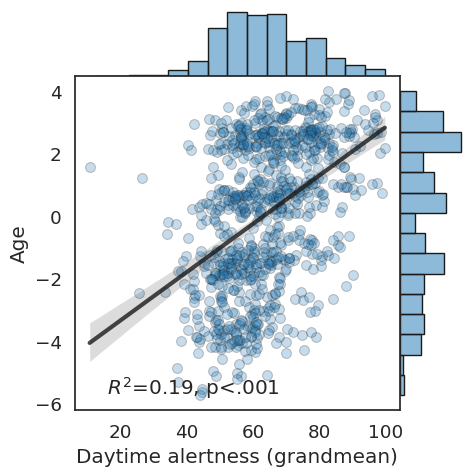

In [39]:
g = sns.jointplot(x='Trait Alertness (true)', y='Age', data=df, height=5, kind="reg", space=0,
              marginal_kws=dict(kde=False, color="tab:blue", bins=15, fill=True, alpha=0.5, lw=1, ec='k'),
           scatter_kws={'alpha': 0.25, "s": 50, "ec": "k", "lw": 0.75, "color": "tab:blue"},
           line_kws=dict(color="k", lw=3, alpha=0.8))

ax = g.ax_joint



# Add unadjusted correlation
corr = df.pairwise_corr(columns=['Trait Alertness (true)', 'Age'])
r2 = corr.at[0, "r"] ** 2
pval = corr.at[0, "p-unc"]
text = f"$R^2$={r2:.2f}, p<.001"
ax.annotate(text, xy=(0.1, 0.05), xycoords="axes fraction", ha="left")

ax.set_xlabel("Daytime alertness (grandmean)")
ax.set_ylabel("Age");